In [1]:
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<ipython-input-1-67f179e507b1>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# importing train data files
store_df= pd.read_csv('store.csv')
train_df= pd.read_csv('train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
test_df = pd.read_csv('test.csv', parse_dates = True, low_memory = False, index_col = 'Date')

## Understanding the data

## 1. Store Data

In [3]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Variable Cleanup
store type: Store type. No comments other than a,b,c,d
assortment: product display, assortment level a = basic, b = extra, c = extended
CompetitionDistance: distance from nearest competitor
CompetitionOpenSince (Month/Year): When the competing stores opened Promo2: Continuous and continuous promotions in select stores
Promo2Since (Year/Week): When the store launched Promo2
PromoInterval: The deployment interval of the Promo2 promotion. In case of Jan, Apr, Jul, Oct, promotion is carried out in January, April, July, and October

In [5]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


It contains information about a total of 1115 stores.
The distance to the nearest competitor is never 0 with min 20, max is 75860 free.
I suspect that the min 1900 at the opening time of a competitor's store is an error. For continuous promotions conducted in stores, the mean is 0.5, and only half of them are being promoted.

In [6]:
store_df.describe(include ="O")

,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


The store type and assortment level are written in the form a, b, c. The promotion interval is also written as a string, and it consists of three values: 1, 4, 7, October / 2, 5, 8, November / 3, 6, 9, and December.

In [7]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

You can see that store.csv has features with a fairly high missing value.
CompetitionDistance is a variable indicating the distance from the nearest competitor,
CompetitionOpenSinceMonth and CompetitionOpenSinceYear are dependent variables.
Promo2 is the presence (1) or absence (0) variable of whether special promotions are carried out for each store,
Promo2SinceWeek,Promo2SinceYear,PromoInterval are dependent variables.

In [8]:
store_df['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [9]:
store_df.loc[store_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
store_df.loc[store_df['Promo2']==0, 'Promo2SinceWeek'].unique()

array([nan])

## 2. Train Data

In [11]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


DayOfWeek: Day of the week. Monday (1) to Sunday (7)
StateHoliday: national or state holidays not including weekends a:holiday b:Easter c:Christmas 0: None
SchoolHoliday: A school day off. All holidays included

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [13]:
train_df.isna().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There were no missing values ​​in the train data set.


In [14]:
test_df.tail()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-08-01,41084,1111,6,1.0,0,0,0
2015-08-01,41085,1112,6,1.0,0,0,0
2015-08-01,41086,1113,6,1.0,0,0,0
2015-08-01,41087,1114,6,1.0,0,0,0
2015-08-01,41088,1115,6,1.0,0,0,1


Only test.csv has an id feature.
Besides sales, which is the y value, there is also no customer, which is the number of customers.

In [15]:
round(train_df.describe(), 2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


In [16]:
round(test_df.describe(), 2)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.00,41088.00,41088.00,41077.00,41088.00,41088.00
mean,20544.50,555.90,3.98,0.85,0.40,0.44
std,11861.23,320.27,2.02,0.35,0.49,0.50
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,10272.75,279.75,2.00,1.00,0.00,0.00
50%,20544.50,553.50,4.00,1.00,0.00,0.00
75%,30816.25,832.25,6.00,1.00,1.00,1.00
max,41088.00,1115.00,7.00,1.00,1.00,1.00


The train.csv and test.csv features generally showed a similar distribution, but there was a big difference in school holidays.
In test.csv, the percentage of school holidays was 44%. The train data set is data for a long period of about 3 years, whereas the test is data for a short period of several months, so it seems that the vacation period overlapped.
Date of test data: 2015-08-01 ~ 2015-09-17

In [17]:
train_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [18]:
train_df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [19]:
train_df['SchoolHoliday'].groupby(train_df['StateHoliday']).mean()

StateHoliday
0    0.168543
a    0.256910
b    0.927653
c    1.000000
Name: SchoolHoliday, dtype: float64


It can be seen that almost all schools are closed on Easter (b) and Christmas (c), and there is a slightly higher probability that school is closed on other public holidays than when it is not.

In [20]:
train_df['DayOfWeek'].value_counts()

4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64

Since it is time series data for a continuous period, the days of the week are distributed almost equally.

## Data Cleaning

## EDA

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

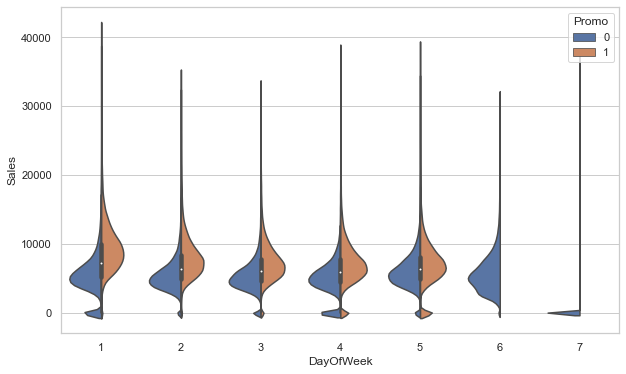

In [22]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='DayOfWeek',y='Sales',hue='Promo',split=True,data=train_df)